#load dataset from kaggle

In [ ]:
import kagglehub
import pandas as pd

# Download the dataset
path = kagglehub.dataset_download("uciml/default-of-credit-card-clients-dataset")

# Check the downloaded files
import os
print(os.listdir(path))

# Load the specific file (e.g., assuming it's a .csv file)
file_path = os.path.join(path, "UCI_Credit_Card.csv")  # Replace with the actual file name
df = pd.read_csv(file_path)

['UCI_Credit_Card.csv']


In [ ]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


#Import Libraries

In [ ]:
# EDA Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# SVM and Modeling Libraries
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Optional for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Set visualization style
%matplotlib inline
sns.set_style("whitegrid")

# problem statment
**Predicting whether a customer will default on his/her credit card , based on several features, including demographic and financial data.** ¶

# Exploratory Data Analysis (EDA)

## Exploration the data and understand it

In [ ]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [ ]:
# order of monthes from septembre to april according to 1 -6 , so will rename PAY_0
df.rename(columns={'PAY_0': 'PAY_1'}, inplace=True)

### Dataset Exploration Insights

### Shape & Structure
- The dataset contains **30,000 rows** and **25 columns**.
- No missing values.
- All columns are numeric (`int` or `float`), which simplifies preprocessing.

### Target Variable: `default.payment.next.month`
- Binary target:  
  - `0` = No default  
  - `1` = Default  
- About **22%** of customers defaulted on their payments. (imbalanced)

---

### Demographics
- **SEX**:  
  - Mean ≈ 1.6 → more females than males  
  - (`1 = Male`, `2 = Female`)
- **EDUCATION**:  
  - Most customers are graduates (value = 2)  
  - Invalid or unclear values: `0`, `5`, `6` → should be grouped or labeled as "Others" , will handle it later.
- **MARRIAGE**:  
  - Values: `1 = Married`, `2 = Single`, `3 = Others`  
  - Value `0` is unclear and may represent "Unknown" → should be recoded , will handle it later.
---
### Credit Limit (`LIMIT_BAL`)
- Ranges from **10,000** to **1,000,000**
- Mean ≈ **167,000**
- Indicates wide variation in customer credit limits
---
### Age (`AGE`)
- Ranges from **21** to **79**
- Median age ≈ **34**
- Most customers are **young adults**
---
### Payment Status (`PAY_0` to `PAY_6`)
- Reflects repayment status from **April to September**
- Values:
  - `0` = Paid on time  
 `-1` `-2` = Early or partial payment (may combine them or group them with 0 ??)
  - Positive values = Number of months delayed
- Mean values ≈ 0 or negative → most customers pay on time
- Some values reach up to **8** months late
---
### Bill Amounts (`BILL_AMT1` to `BILL_AMT6`)
- Monthly statement balances  
- Some negative values → likely refunds or corrections  , will discuss it
---
### Payment Amounts (`PAY_AMT1` to `PAY_AMT6`)
- Highly skewed data  
- Most customers pay a few thousand  
- Some outliers with very large payments

---
**mothes** it goes backward from September (PAY_1) to March (PAY_6):[ September,August,July,July,May,April]
---
**Example**: In September, a customer had PAY_0 = 2, BILL_AMT1 = 50,000, and PAY_AMT1 = 10,000.

**Interpretation**: This means the customer was 2 months behind on payments, owed 50,000, and paid only 10,000, indicating partial and late repayment.


## cleaning

In [ ]:
# check duplications
df.duplicated().sum()

np.int64(0)

In [ ]:
# see the unique value in each column to check if there are any issues or not
for col in df.columns:
    print(f"Value counts for: {col}")
    print(df[col].unique())
    print("-" * 40)


Value counts for: ID
[    1     2     3 ... 29998 29999 30000]
----------------------------------------
Value counts for: LIMIT_BAL
[  20000.  120000.   90000.   50000.  500000.  100000.  140000.  200000.
  260000.  630000.   70000.  250000.  320000.  360000.  180000.  130000.
  450000.   60000.  230000.  160000.  280000.   10000.   40000.  210000.
  150000.  380000.  310000.  400000.   80000.  290000.  340000.  300000.
   30000.  240000.  470000.  480000.  350000.  330000.  110000.  420000.
  170000.  370000.  270000.  220000.  190000.  510000.  460000.  440000.
  410000.  490000.  390000.  580000.  600000.  620000.  610000.  700000.
  670000.  680000.  430000.  550000.  540000. 1000000.  530000.  710000.
  560000.  520000.  750000.  640000.   16000.  570000.  590000.  660000.
  720000.  327680.  740000.  800000.  760000.  690000.  650000.  780000.
  730000.]
----------------------------------------
Value counts for: SEX
[2 1]
----------------------------------------
Value counts for:

In [ ]:
# EDUCATION: Combine uncommon values into 'Others' category
df['EDUCATION'] = df['EDUCATION'].replace({0: 4, 5: 4, 6: 4})  # 4 = 'Others'

# MARRIAGE: Replace 0 with a new category (e.g. 3 = Unknown)
df['MARRIAGE'] = df['MARRIAGE'].replace(0, 3)

In [ ]:
 # replaced -1 and -2 with 0, treating them as no delay
pay_features = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for col in pay_features:
    df[col] = df[col].replace([-2, -1], 0)  # Now: 0 = no delay, >0 = months delaye

In [ ]:
# in PAY_AMT1 to PAY_AMT6: ,There are some very high values (e.g., 220,000+) — clear outliers.
# apply log transformation  to reduce skewness.
pay_amt_cols = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
for col in pay_amt_cols:
    df[col] = np.log1p(df[col])  # log1p handles 0 values safely

In [ ]:
# for check fixing the issues
for col in df.columns:
    print(f"Value counts for: {col}")
    print(df[col].unique())
    print("-" * 40)

Value counts for: ID
[    1     2     3 ... 29998 29999 30000]
----------------------------------------
Value counts for: LIMIT_BAL
[  20000.  120000.   90000.   50000.  500000.  100000.  140000.  200000.
  260000.  630000.   70000.  250000.  320000.  360000.  180000.  130000.
  450000.   60000.  230000.  160000.  280000.   10000.   40000.  210000.
  150000.  380000.  310000.  400000.   80000.  290000.  340000.  300000.
   30000.  240000.  470000.  480000.  350000.  330000.  110000.  420000.
  170000.  370000.  270000.  220000.  190000.  510000.  460000.  440000.
  410000.  490000.  390000.  580000.  600000.  620000.  610000.  700000.
  670000.  680000.  430000.  550000.  540000. 1000000.  530000.  710000.
  560000.  520000.  750000.  640000.   16000.  570000.  590000.  660000.
  720000.  327680.  740000.  800000.  760000.  690000.  650000.  780000.
  730000.]
----------------------------------------
Value counts for: SEX
[2 1]
----------------------------------------
Value counts for:

In [ ]:
df.drop("ID",axis=1,inplace=True)
df.columns.tolist()

['LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default.payment.next.month']

## analysis

<Axes: title={'center': 'Default vs No Default'}, xlabel='default.payment.next.month'>

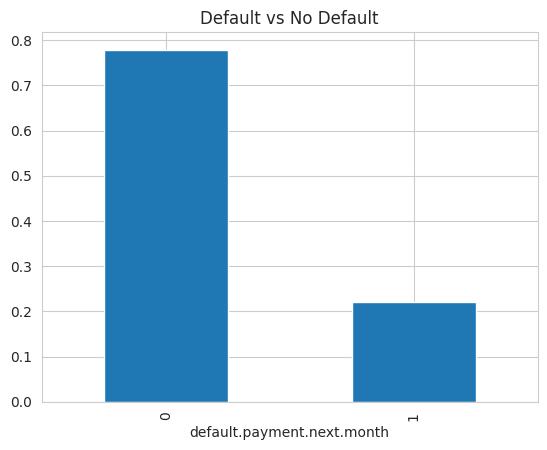

In [ ]:
# Target Variable Distribution , 0 for customers pay their bill and 1 for customers will default (not pay)
df['default.payment.next.month'].value_counts(normalize=True).plot(kind='bar', title='Default vs No Default')

<Axes: >

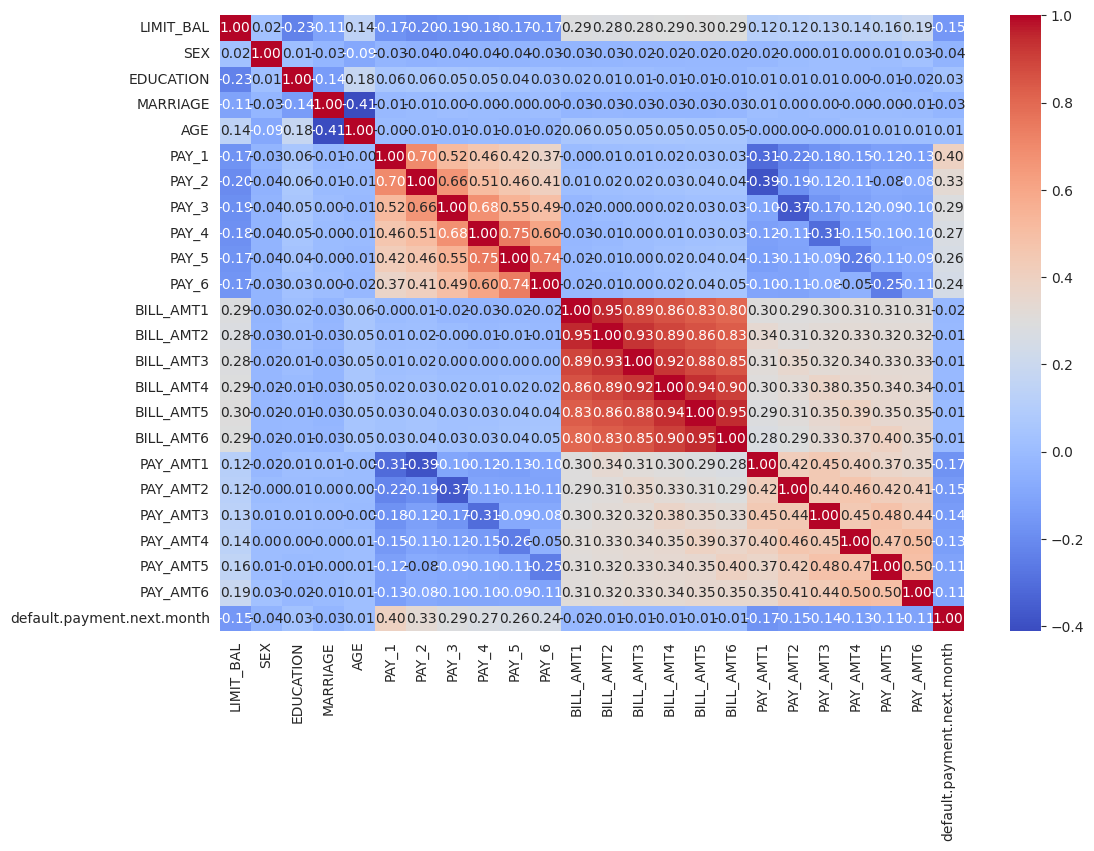

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')

<Axes: xlabel='MARRIAGE'>

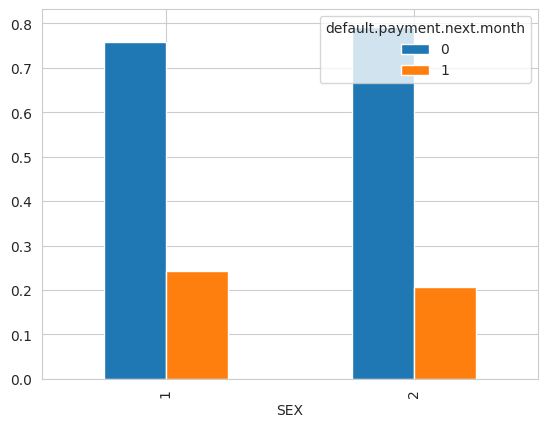

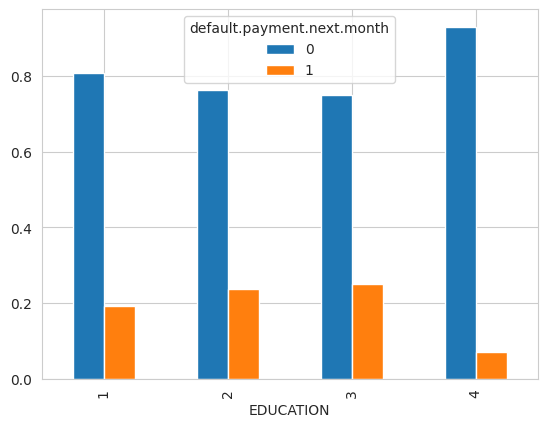

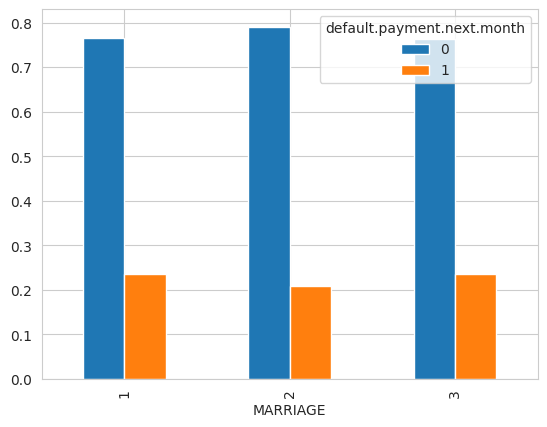

In [ ]:
# Basic Demographic Analysis with target column
pd.crosstab(df['SEX'], df['default.payment.next.month'], normalize='index').plot(kind='bar')
pd.crosstab(df['EDUCATION'], df['default.payment.next.month'], normalize='index').plot(kind='bar')
pd.crosstab(df['MARRIAGE'], df['default.payment.next.month'], normalize='index').plot(kind='bar')

<Axes: >

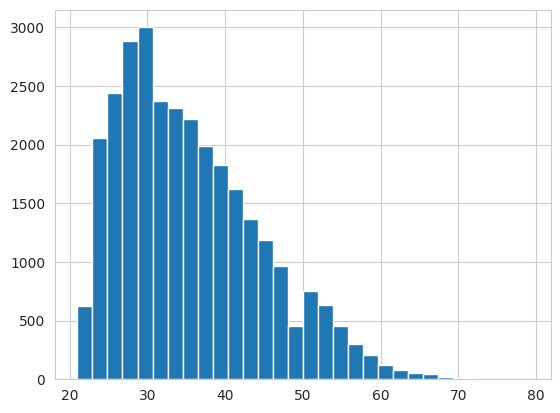

In [ ]:
# Age Distribution
df['AGE'].hist(bins=30)

<Axes: >

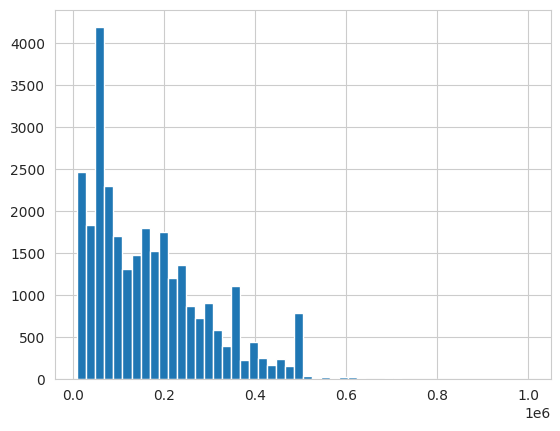

In [ ]:
# Limit_bal distribution
df['LIMIT_BAL'].hist(bins=50)

<Axes: >

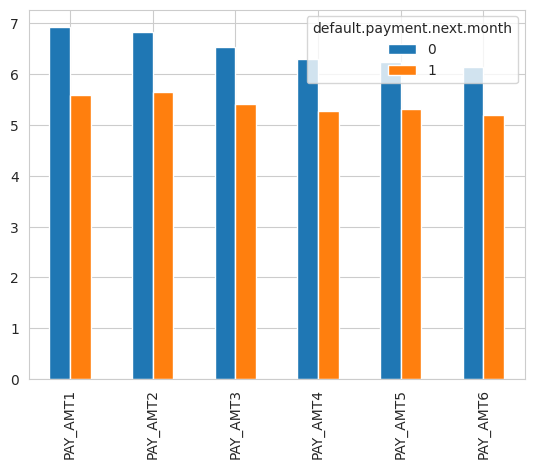

In [ ]:
#Do people who pay more default less? -> yes , paying more is linked to lower default.
pay_amt_cols = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
df.groupby('default.payment.next.month')[pay_amt_cols].mean().T.plot(kind='bar')

<Axes: title={'center': 'Avg Credit Limit by Default Status'}, xlabel='default.payment.next.month'>

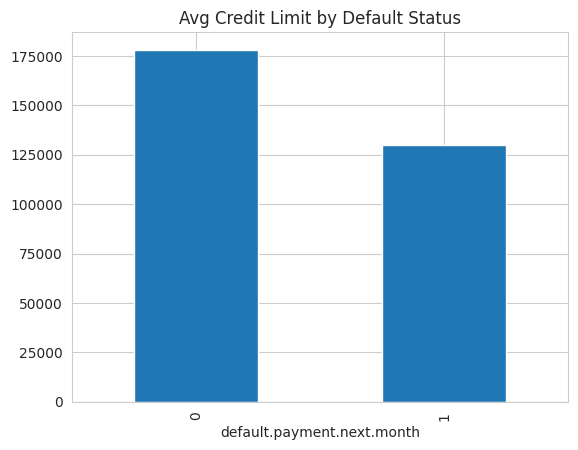

In [ ]:
#Do higher credit limits reduce the chance of default?
df.groupby('default.payment.next.month')['LIMIT_BAL'].mean().plot(kind='bar', title='Avg Credit Limit by Default Status')

<Axes: title={'center': 'Marriage Status vs Default Rate'}, xlabel='MARRIAGE'>

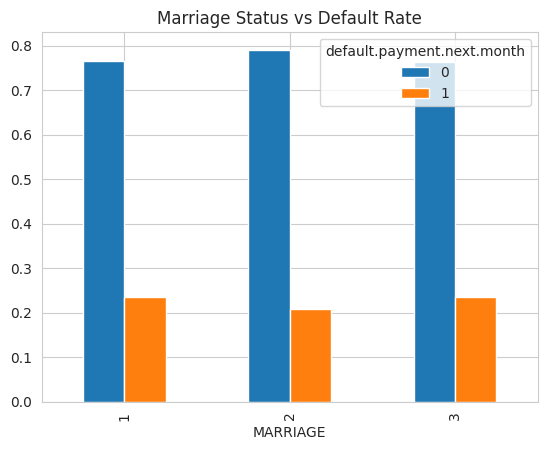

In [ ]:
#Does marital status affect defaulting?
marriage_default = pd.crosstab(df['MARRIAGE'], df['default.payment.next.month'], normalize='index')
marriage_default.plot(kind='bar',  title='Marriage Status vs Default Rate')

<Axes: title={'center': 'Avg Payment Status by Default'}>

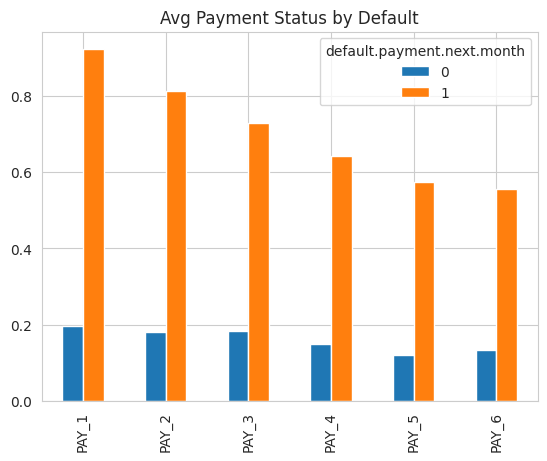

In [ ]:
# Who delays payments more often — defaulters or non-defaulters?
pay_status_cols = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
df.groupby('default.payment.next.month')[pay_status_cols].mean().T.plot(kind='bar', title='Avg Payment Status by Default')

## Feature Scaling

In [ ]:
import cudf
#from cuml.preprocessing import StandardScaler
#from cuml.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, accuracy_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
import joblib

In [ ]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,0,0,0,...,0.0,0.0,0.0,0.000000,6.536692,0.000000,0.000000,0.000000,0.000000,1
1,120000.0,2,2,2,26,0,2,0,0,0,...,3272.0,3455.0,3261.0,0.000000,6.908755,6.908755,6.908755,0.000000,7.601402,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,7.325808,7.313887,6.908755,6.908755,6.908755,8.517393,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,7.601402,7.610853,7.090910,7.003974,6.975414,6.908755,0
4,50000.0,1,2,1,57,0,0,0,0,0,...,20940.0,19146.0,19131.0,7.601402,10.510041,9.210440,9.105091,6.536692,6.522093,0


In [ ]:
df.isna().sum().sum()

np.int64(0)

## Model Building

In [ ]:
X = df.drop('default.payment.next.month', axis=1)
y = df['default.payment.next.month']

In [ ]:
X_resampled, y_resampled = SMOTE(sampling_strategy=0.5).fit_resample(X, y)

<Axes: title={'center': 'Default vs No Default'}, xlabel='default.payment.next.month'>

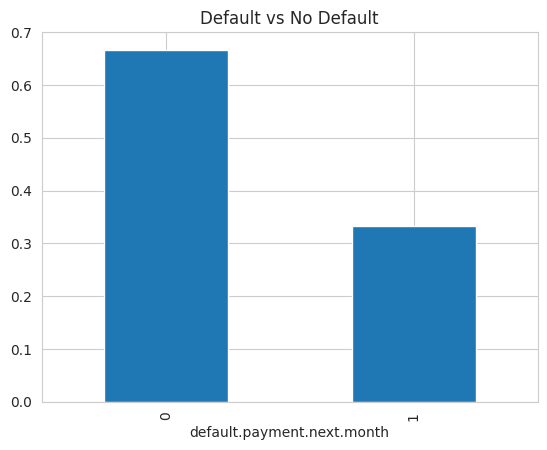

In [ ]:
# Target Variable Distribution , 0 for customers pay their bill and 1 for customers will default (not pay)
y_resampled.value_counts(normalize=True).plot(kind='bar', title='Default vs No Default')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2)

In [ ]:
cols_to_scale = [
    'LIMIT_BAL', 'AGE',
    'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
    'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
    'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
    'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
    'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'
]
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

In [ ]:
X_train_scaled[cols_to_scale] = scaler.fit_transform(X_train_scaled[cols_to_scale])
X_test_scaled[cols_to_scale] = scaler.transform(X_test_scaled[cols_to_scale])

### Backward Elimination

In [ ]:
logReg = LogisticRegression()
rfe = RFE(estimator=logReg, n_features_to_select=15)
X_selected = rfe.fit_transform(X_train_scaled, y_train)

selected_features = X.columns[rfe.support_]
print("Selected features:", selected_features.tolist())

Selected features: ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_3', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT4', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4']


In [ ]:
X_train_scaled_backward = X_train_scaled[selected_features].copy()
X_test_scaled_backward = X_test_scaled[selected_features].copy()

### Correlation Feature Selection

In [ ]:
corr_matrix = X_train_scaled.corr().abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

X_train_scaled_corr = X_train_scaled.drop(columns=to_drop)
X_test_scaled_corr = X_test_scaled.drop(columns=to_drop)
print("Selected features:", X_train_scaled_corr.columns.tolist())

Selected features: ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


In [ ]:
# detect best kernel on current data
kernels = ['rbf', 'linear', 'sigmoid', 'poly']
c_levels = [0.001, 0.1, 1, 5, 10, 20, 100]
gamma_levels = ['scale', 'auto']

def trainf(X_input, X_test_):
  best_score = 0
  best_kernel = None
  best_c_level = None
  best_gamma_level = None

  for kernel in kernels:
    for c in c_levels:
      for gamma in gamma_levels:
        model = SVC(kernel=kernel, C=c, gamma=gamma)

        X_input = cudf.DataFrame(X_input)
        y_train_ = y_train.copy()
        y_train_ = cudf.DataFrame(y_train_)
        X_test_ = cudf.DataFrame(X_test_)

        model.fit(X_input, y_train_)
        y_pred = model.predict(X_test_)
        y_pred_np = y_pred.to_numpy()

        score = recall_score(y_test, y_pred_np)
        if score > best_score:
          best_score = score
          best_kernel = kernel
          best_c_level = c
          best_gamma_level = gamma

  return best_kernel, best_score, best_c_level, best_gamma_level


In [ ]:
kernel, score, c_levels, gamma_levels = trainf(X_train_scaled, X_test_scaled)
print("kernel:", kernel)
print("score:", score)
print("c level:", c_levels)
print("gamma:", gamma_levels)

In [ ]:
backward_kernel, backward_score, backward_c_levels, backward_gamma_levels = trainf(X_train_scaled_backward, X_test_scaled_backward)
print("Backward kernel:", backward_kernel)
print("Backward score:", backward_score)
print("Backward c level:", backward_c_levels)
print("Backward gamma:", backward_gamma_levels)

In [ ]:
corr_kernel, corr_score, corr_c_levels, corr_gamma_levels = trainf(X_train_scaled_corr, X_test_scaled_corr)
print("correlation kernel:", corr_kernel)
print("correlation score:", corr_score)
print("correlation c level:", corr_c_levels)
print("correlation gamma:", corr_gamma_levels)

correlation kernel: rbf
correlation score: 0.5207514198339886
correlation c level: 100
correlation gamma: auto


## Final Class

In [ ]:
X = df.drop('default.payment.next.month', axis=1)
X = X[X_train_scaled_corr.columns.tolist()]
y = df['default.payment.next.month']

In [ ]:
X_resampled, y_resampled = SMOTE(sampling_strategy=0.5).fit_resample(X, y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2)

In [ ]:
f1score = f1_score(y, y)
f1score

1.0

In [ ]:
class CreditRiskModel:
    def __init__(self, n_features_to_select=15, n_components=10):
        self.scaler = StandardScaler()
        self.model = SVC(kernel='rbf', C=100.0, gamma='auto')
        self.accuracy_score=0
        self.recall_score=0
        self.classification_report = 0
        self.f1score=0

        self.cols_to_scale = [
            'LIMIT_BAL', 'AGE',
            'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
            'BILL_AMT1', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
            'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'
        ]

    def fit(self, X, y):
        # Scaling
        X_scaled = X.copy()
        X_scaled[self.cols_to_scale] = self.scaler.fit_transform(X[self.cols_to_scale])

        # Convert to cuDF and train
        #X_cudf = cudf.DataFrame(X_scaled)
        #y_cudf = cudf.Series(y)

        self.model.fit(X_scaled, y)

    def predict(self, X):
        # Same transformation as during training
        X_scaled = X.copy()
        X_scaled[self.cols_to_scale] = self.scaler.transform(X[self.cols_to_scale])

        #X_cudf = cudf.DataFrame(X_scaled)
        return self.model.predict(X_scaled)

    def computeScore(self,X, y):
        y_pred = self.predict(X)
        self.accuracy_score = accuracy_score(y, y_pred)
        self.recall_score = recall_score(y, y_pred)
        self.f1score = f1_score(y, y_pred)
        self.classification_report = classification_report(y, y_pred)


In [ ]:
clf = CreditRiskModel()
clf.fit(X_train, y_train)

In [ ]:
clf.computeScore(X_test, y_test)
print("Accuracy Score:", clf.accuracy_score)
print("Recall Score:", clf.recall_score)
print("F1 Score:", clf.f1score)
print("Classification Report:", clf.classification_report)

Accuracy Score: 0.7791726105563481
Recall Score: 0.5269587194608256
F1 Score: 0.6177777777777778
Classification Report:               precision    recall  f1-score   support

           0       0.79      0.91      0.84      4636
           1       0.75      0.53      0.62      2374

    accuracy                           0.78      7010
   macro avg       0.77      0.72      0.73      7010
weighted avg       0.77      0.78      0.77      7010



In [ ]:
# print(X_test.sample(1))
columns = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
new_data = [80000.0, 2, 2, 1, 46,2,1,3,2,2,1,4742.0,7.153052 ,8.762177, 4.634729, 3.583519 , 7.523481,8.716044 ]
# Reshape new_data to have 1 row and 18 columns
features = pd.DataFrame([new_data], columns=columns)

print(clf.predict(features))

[1]


In [ ]:
joblib.dump(clf, "credit_model.pkl")

['credit_model.pkl']

# problems
1. data is imbalnced try model  (SMOTE)
2. How to select features
try model
3. what is feature exraction strage
try model (lda , pca)  
4. pipline and make sure of same rusel
5. serilize pipline
=> send shehab

# Data balancing

## avalible methods
- [x] over sampling for minorty class (SMOTE)
- [ ] under sampling for magorty class
- [x] use class wights => wraper methods
- [ ] Threshold Tuning
- [x] Evaluation Metrics (Recoll)

# model trying first try
- what models are using
- choce two or three modles
- fine tune them using grid search and Random search
- choce best model

# feature selection
- [x] wraper method
  - Forward Selection
  - [x] Backward Elimination
  - Recursive Feature Elimination
- [x] filter method
  - [x] Correlation Coefficient (numrical data)
  - Chi-square test
  - Anova
- [ ] Embedded Methods
  - Lasso
  - Ridge
  - Tree-based models

# feature extraction
- t-SNE => visulaztion
- LDA (supervised)
- PCA (unsupervised)

# Evalution method
- High recall = few false negatives (i.e., few missed defaulters).
- F1-Score = Useful if you also want to balance the cost of false positives with recall.
- Precision-Recall Curve and AUC-PR

# pipline seriliztion